In [1]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary
from ga4stpg.graph.util import is_steiner_tree

from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.mstcrossover import CrossoverPrimUnion
from ga4stpg.tree.generate import GenerateBasedPrimRST
from ga4stpg.tree.mutate import ReplaceByRandomEdge, PrimBasedMutation, Prunning

In [2]:
from ga4stpg.condition import BestKnownReached, Stagnation
from ga4stpg.customevol import GeneticEvolution as Evolution
from ga4stpg.customevol import GeneticPopulation as GPopulation
from ga4stpg.normalization import normalize
from ga4stpg.selector import roullete
from ga4stpg.tracker import DataTracker
from ga4stpg.util import STEIN_B, display, update_best, update_generation

In [3]:
from os import path
import config

In [4]:
# import seaborn as sns
# from matplotlib import pyplot as plt 
# import numpy as np
# import pandas as pd
# from scipy import stats

In [5]:
STEIN_B

[('steinb1.txt', 82),
 ('steinb2.txt', 83),
 ('steinb3.txt', 138),
 ('steinb4.txt', 59),
 ('steinb5.txt', 61),
 ('steinb6.txt', 122),
 ('steinb7.txt', 111),
 ('steinb8.txt', 104),
 ('steinb9.txt', 220),
 ('steinb10.txt', 86),
 ('steinb11.txt', 88),
 ('steinb12.txt', 174),
 ('steinb13.txt', 165),
 ('steinb14.txt', 235),
 ('steinb15.txt', 318),
 ('steinb16.txt', 127),
 ('steinb17.txt', 131),
 ('steinb18.txt', 218)]

In [6]:
INDEX = 2

# instance_problem = STEIN_B[INDEX][0]
instance_problem = "steind20.txt"
filename = path.join(config.dataset_directory, instance_problem)
stpg = ReaderORLibrary().parser(filename)

print("STPG information", '\n', 10*'- ','\n')
print('Instance: ', stpg.name)
# print('Best Known cost: ', STEIN_B[INDEX][1])
print("Nro. Node:", stpg.nro_nodes)
print("Nro. Edges:", stpg.nro_edges)
print("Nro. Terminals:", stpg.nro_terminals)
print("Terminals: \n", stpg.terminals)

STPG information 
 - - - - - - - - - -  

Instance:  D20
Nro. Node: 1000
Nro. Edges: 25000
Nro. Terminals: 500
Terminals: 
 {2, 5, 7, 9, 10, 11, 12, 15, 16, 17, 20, 21, 22, 23, 24, 25, 30, 31, 33, 35, 37, 38, 39, 40, 41, 42, 44, 46, 48, 51, 52, 53, 54, 55, 57, 62, 64, 65, 69, 71, 75, 76, 77, 81, 85, 87, 89, 90, 91, 94, 95, 96, 101, 103, 104, 112, 113, 115, 117, 118, 120, 121, 123, 126, 127, 129, 130, 131, 134, 137, 143, 144, 147, 150, 152, 154, 155, 156, 158, 159, 161, 162, 163, 166, 170, 172, 173, 175, 176, 179, 180, 181, 182, 185, 188, 189, 190, 192, 194, 196, 198, 200, 201, 202, 205, 209, 210, 211, 217, 218, 221, 224, 227, 228, 229, 231, 232, 234, 235, 236, 239, 240, 241, 243, 244, 250, 251, 256, 257, 258, 261, 265, 266, 269, 271, 272, 273, 274, 276, 277, 280, 282, 284, 285, 286, 288, 291, 296, 298, 301, 302, 304, 306, 307, 309, 310, 311, 313, 314, 317, 320, 323, 325, 326, 327, 331, 333, 334, 335, 337, 338, 343, 344, 345, 347, 348, 349, 350, 351, 352, 357, 358, 362, 363, 365, 366, 3

In [7]:
generator = GenerateBasedPrimRST(stpg)
evaluator = EvaluateTreeGraph(stpg)
crossover = CrossoverPrimUnion(stpg)
prunner   = Prunning(stpg)
mut_prim  = PrimBasedMutation(stpg)
replace_random = ReplaceByRandomEdge(stpg)

In [8]:
output_data_dir = path.join("data", stpg.name)
tracker = DataTracker('002',target=output_data_dir)

In [9]:
population = (GPopulation(
        chromosomes=[ generator() for _ in range(50)],
        eval_function=evaluator,
        maximize=True)
    .evaluate()
    .normalize(norm_function=normalize)
    .callback(update_best))

In [10]:
evol = (Evolution()
        .evaluate()
        .normalize(norm_function=normalize)
        .callback(update_best)
        .callback(tracker.log_evaluation)
        .select(selection_func=roullete)
        .crossover(combiner=crossover)
        .mutate(mutate_function=replace_random, probability=0.4)
        .mutate(mutate_function=mut_prim, probability=0.2)
        .mutate(mutate_function=prunner, probability=0.2)
        .callback(update_generation)
        .callback(display, every=100))

In [11]:
%%time
result = population.evolve(evol, n=2_000)

Population 2a7f99 | size 50 | generation 100 | best cost 579
Population 2a7f99 | size 50 | generation 200 | best cost 573
Population 2a7f99 | size 50 | generation 300 | best cost 571
Population 2a7f99 | size 50 | generation 400 | best cost 564
Population 2a7f99 | size 50 | generation 500 | best cost 564
Population 2a7f99 | size 50 | generation 600 | best cost 564
Population 2a7f99 | size 50 | generation 700 | best cost 564
Population 2a7f99 | size 50 | generation 800 | best cost 564
Population 2a7f99 | size 50 | generation 900 | best cost 564
Population 2a7f99 | size 50 | generation 1000 | best cost 564
Population 2a7f99 | size 50 | generation 1100 | best cost 564
Population 2a7f99 | size 50 | generation 1200 | best cost 563
Population 2a7f99 | size 50 | generation 1300 | best cost 563
Population 2a7f99 | size 50 | generation 1400 | best cost 563
Population 2a7f99 | size 50 | generation 1500 | best cost 563
Population 2a7f99 | size 50 | generation 1600 | best cost 562
Population 2a7f99

In [12]:
tracker.report()

In [13]:
best_overall = result.documented_best

In [14]:
is_steiner_tree(best_overall.chromosome, stpg)

(True,
 {'has_cycle': False,
  'all_terminals_in': True,
  'all_leaves_are_terminals': True,
  'all_edges_are_reliable': True,
  'graph_is_connected': True})

In [15]:
best_overall.cost

562

In [16]:
best_overall.fitness

33

In [17]:
pop = result.evaluate().normalize(norm_function=normalize)

In [18]:
pop.current_best

In [19]:
current_best = result.current_best

In [20]:
current_best.fitness

21

In [21]:
current_best.cost

574

In [22]:
costs = [p.cost for p in result]

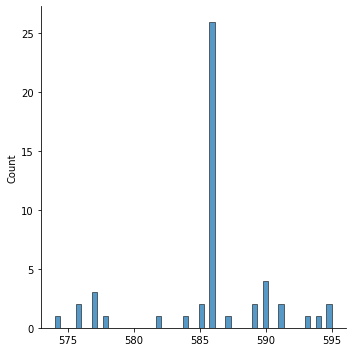

In [23]:
import seaborn as sns 

sns.displot(costs)